# **Chapter 2: Processes**

To understand why processes are so important, we need to look at how computer systems evolved.

#### **From Single-Tasking to Multitasking**

**Early computers** were very simple. They allowed only **one program to be executed at a time**. When that program ran, it had **complete control** over the entire system—the CPU, memory, and all input/output devices. There was no operating system in the way we think of it today to manage resources or provide protection.

**Contemporary computer systems** are completely different. They allow **multiple programs to be loaded into memory and executed concurrently**. This shift from single-tasking to multitasking created a major problem: how do you stop these programs from interfering with each other? What if one program crashes? Should it take down the entire system? What if a program has an infinite loop? Should it monopolize the CPU forever?

#### **The Process as the Solution**

The answer to these problems was the creation of the **process**. The need for "firmer control and more compartmentalization" of programs led directly to this concept. By defining each running program as a distinct process, the operating system can:

*   **Isolate** them from one another.
*   **Manage** the resources (CPU time, memory) allocated to each one.
*   **Protect** the system and other programs from any single misbehaving program.

This is why a process is called **the unit of work in a modern computing system**. The OS doesn't manage "programs"; it manages "processes."

#### **System Processes and User Processes**

A modern operating system is more than just a program launcher. It has many internal jobs to do, like managing memory, scheduling tasks, and handling network traffic. The text makes a key distinction:

*   **User Processes:** These are the processes executing your code, like your web browser or word processor.
*   **System Processes:** These are processes that execute **operating system code**. However, for stability and design reasons, not all OS code runs in the privileged kernel mode. Much of it runs as separate processes in **user space**.

Therefore, a running system is actually a **collection of processes**—a mix of user applications and system utilities—all working together.

#### **The Illusion of Concurrency**

The text states that "all these processes can execute concurrently, with the CPU (or CPUs) multiplexed among them." Let's break down what this means for your computer architecture background:

*   On a **single-core CPU**, only one process can actually be executing an instruction at any single moment. The CPU is rapidly switched between all the active processes. This is called **time-sharing** or **multiplexing**. Each process gets a small slice of CPU time (a few milliseconds), making it *appear* as if all processes are running simultaneously.
*   On a **multi-core CPU**, true parallelism is possible, where multiple processes actually run at the exact same time, each on its own core.

In both scenarios, the operating system's **process scheduler** is the component responsible for deciding which process runs next on which CPU core. This will be covered in more detail later in the chapter.


## **3.1 Process Concept**

### **3.1.1 What is a Process?**

Think about everything your computer is doing right now. You might have a web browser, a music player, and a code editor all running at the same time. From the operating system's perspective, each of these running applications is a **process**.

Historically, the term "job" was used, especially in early batch systems. While "process" is the more modern and precise term, you will still encounter "job" in contexts like "job scheduling" because it's deeply rooted in operating system history and theory.

**The Core Definition:**
A process is a **program in execution**. It's a live, active entity. To understand what a process is, we need to look at what makes it up.

#### **The Components of a Process in Memory**

A process isn't just the code; it's the entire context needed to run that code. When a program is loaded into memory to become a process, its memory layout is divided into several sections. **Go to Figure 3.1** to see the typical layout of a process in memory.


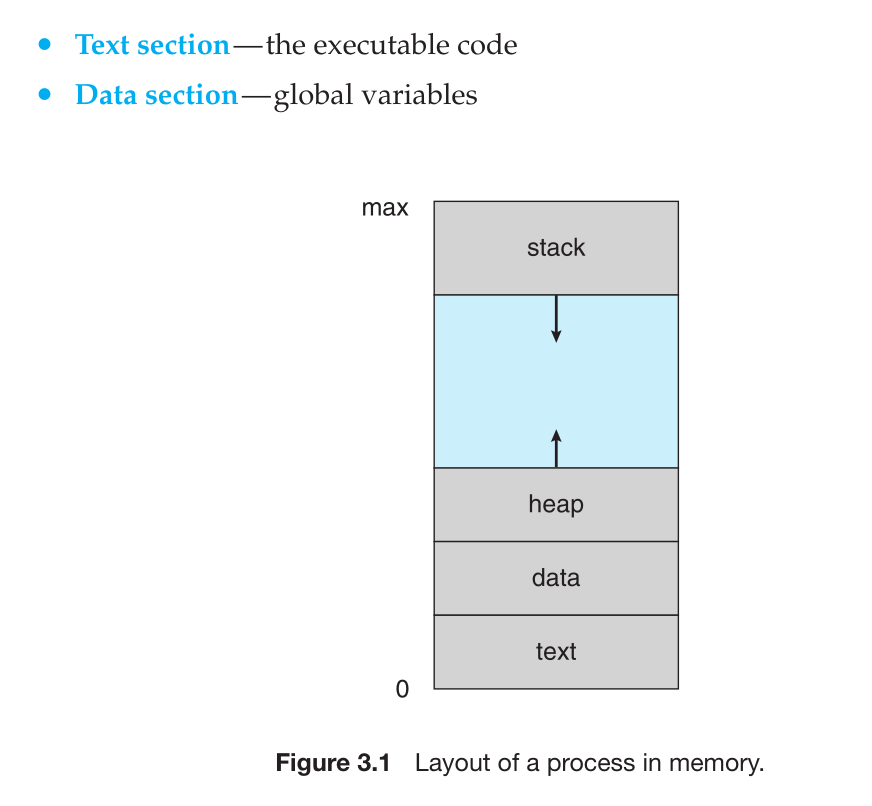



Let's break down each section from the figure:

*   **Text Section:** This is the actual executable code of the program. It's the machine instructions that the CPU follows. This section is read-only to prevent a program from accidentally modifying its own instructions.
*   **Data Section:** This section holds **global variables**. These are variables that are defined outside of any function and exist for the lifetime of the program.
*   **Heap Section:** This is memory that is **dynamically allocated** during program run time. When you use commands like `malloc()` in C or `new` in C++/Java, you are requesting memory from the heap. The heap grows *upwards* (towards higher memory addresses).
*   **Stack Section:** The stack is used for temporary data storage when invoking functions. Each time a function is called, an **activation record** (or stack frame) is pushed onto the stack. This frame contains:
    *   Function parameters
    *   Return addresses (where to go back to when the function is done)
    *   Local variables
    When the function returns, its activation record is popped off the stack. The stack grows *downwards* (towards lower memory addresses).

**Dynamic Behavior:**
The sizes of the **text** and **data** sections are fixed when the program starts. However, the **stack** and **heap** can shrink and grow dynamically during execution. As you call more functions, the stack grows. As you allocate more memory, the heap grows. The operating system must ensure that these two sections never collide as they grow towards each other.

#### **Crucial Distinction: Program vs. Process**

This is a fundamental concept:
*   A **program** is a **passive** entity. It's just a file on your disk (an executable file) containing a list of instructions. It does *nothing* by itself.
*   A **process** is an **active** entity. It has a **program counter** (which tells it the next instruction to execute) and a set of associated resources (like memory, CPU registers, and open files).

A program becomes a process when that executable file is **loaded into memory**. This happens when you double-click its icon or run it from the command line (e.g., `a.out`).

#### **Multiple Processes from One Program**

It's possible to have multiple processes that are all instances of the same program. For example, if you open three different terminal windows, you have three separate processes running the shell program. Even though the **text section** (the executable code) is identical for all of them, each process has its own, separate **data, heap, and stack** sections. This is why one crashed web browser tab doesn't necessarily crash the entire browser—each tab is often a separate process.

#### **Processes as Execution Environments**

A process can itself be a platform for running other code. A perfect example is the **Java Virtual Machine (JVM)**.

When you run `java Program`, the operating system creates a process for the JVM. This JVM process then loads your `Program.class` file and interprets its instructions, executing them on your behalf using native machine instructions. The JVM process is the real process the OS manages, and your Java program runs within this controlled environment.

### **3.1.2 Process State**

A process is not a static entity; it is dynamic. As it executes, its current activity changes, and we describe this using its **state**. The state of a process is defined by what it is currently doing. A process can be in one of several distinct states.

#### **The Five Process States**

Here are the five fundamental states a process can be in:

1.  **New:** The process is in the middle of being created. The operating system is setting up its process control block (we'll cover this later) and loading its program into memory.
2.  **Running:** Instructions are being executed on a CPU core. This is the state where the process is actively using the processor.
3.  **Waiting (or Blocked):** The process cannot proceed because it is waiting for an external event to occur. Common examples include:
    *   Waiting for user input (like a keyboard press).
    *   Waiting for data to be read from or written to a disk (I/O operation).
    *   Waiting for a signal from another process.
4.  **Ready:** The process is loaded in memory and is capable of executing, but the operating system has not assigned it to a CPU core yet. It is patiently waiting for its turn to run. There is often a **ready queue** where all ready processes reside.
5.  **Terminated:** The process has finished executing. The operating system is in the process of cleaning up its resources (freeing memory, etc.).

**Crucial Point:** On a system with a single CPU core, **only one process can be in the "Running" state at any given instant**. However, many processes can simultaneously be in the "Ready" and "Waiting" states.

#### **The Process State Diagram**


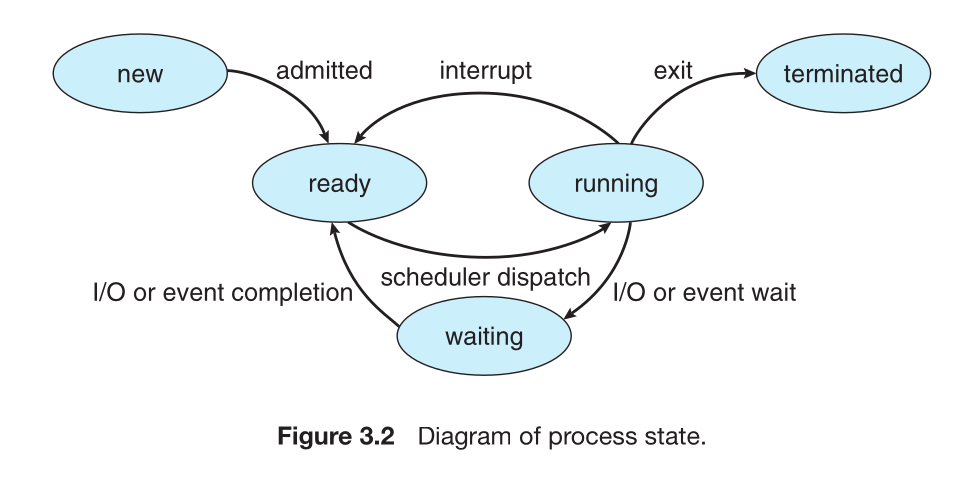





The transitions between these states are best visualized with a diagram. **Go to Figure 3.2** to see the process state transition diagram. Let's walk through what each arrow means:

*   **New -> Ready:** When the OS finishes creating the process, it moves it from "New" to the "Ready" queue. This transition is called **admit**.
*   **Ready -> Running:** When the operating system's **scheduler** decides it's time for a process to run, it selects a process from the "Ready" state and assigns it to a CPU. This transition is called **dispatch**.
*   **Running -> Ready:** A running process can be forced back to the "Ready" state for two main reasons, often related to **interrupts**:
    1.  A timer interrupt occurs, meaning the process has used up its maximum allowed time slice (its "turn" on the CPU). This prevents one process from hogging the CPU.
    2.  A higher-priority process becomes ready and preempts the current one.
*   **Running -> Waiting:** A process voluntarily moves itself to the "Waiting" state when it requests something that takes time and doesn't need the CPU, like an I/O operation (e.g., reading a file). The process is said to **issue a wait** for that event.
*   **Waiting -> Ready:** When the event the process was waiting for finally occurs (e.g., the disk read completes), the process moves from "Waiting" back to the "Ready" queue. This is an **I/O or event completion**.
*   **Running -> Terminated:** A process moves to the "Terminated" state when it finishes executing its final instruction (voluntarily) or is forcibly killed (involuntarily). It then **exits**.

---

#### **Memory Layout of a C Program (A Closer Look)**

The previous section gave a general overview of a process's memory layout. Now, let's see how this maps directly to a real C program. The text provides a specific diagram for a C program's memory layout, which refines the general picture from Figure 3.1.

The key differences for a C program are:

*   The **data section** is often split into two parts:
    *   **Initialized Data:** Contains global variables that were given a starting value (e.g., `int y = 15;`).
    *   **Uninitialized Data (often called `bss`):** Contains global variables that were *not* explicitly initialized (e.g., `int x;`). The OS initializes these to zero.
*   The **stack** also includes space for the command-line arguments `argc` and `argv` passed to the `main()` function.

**Using the `size` Command:**
You can inspect the sizes of these sections in a compiled program using the `size` command. For a program named `memory`, running `size memory` might output:

```
text    data     bss     dec     hex filename
1158     284       8    1450     5aa memory
```

*   **text:** The size of the code section (1158 bytes).
*   **data:** The size of the *initialized* data section (284 bytes).
*   **bss:** The size of the *uninitialized* data section (8 bytes). The term `bss` is a historical acronym for "block started by symbol."
*   **dec/hex:** The sum of the three sections in decimal (1450) and hexadecimal (5aa).

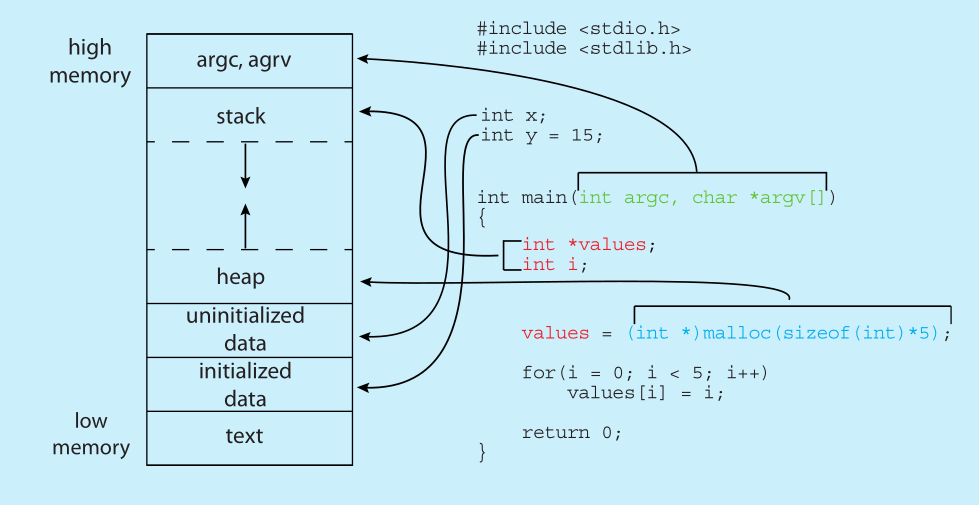

### **3.1.3 Process Control Block**

Now that we know what a process is and the states it can be in, a critical question arises: How does the operating system keep track of all this information for every single process? The answer is the **Process Control Block (PCB)**, which is sometimes also called a *task control block*.

Think of the PCB as a process's **resume or ID card** within the operating system. Each process has exactly one PCB, and the OS uses these PCBs to manage and control all processes. **Go to Figure 3.3** to see a representation of a PCB.


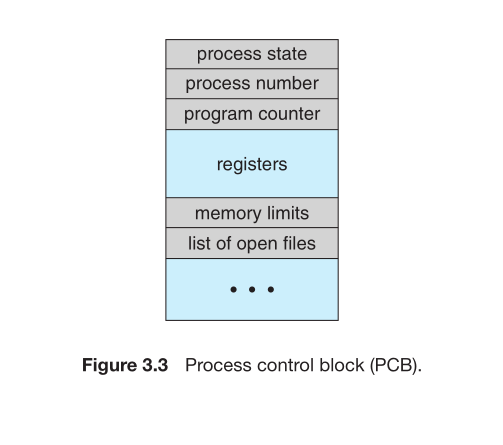






The PCB is a data structure that contains all the information the OS needs to know about a specific process. Let's break down its essential components:

#### **Components of the Process Control Block**

1.  **Process State:** This field stores the current state of the process (e.g., running, ready, waiting, etc.), as defined in the previous section.

2.  **Program Counter:** This is a crucial piece of information. The PC holds the memory address of the **next instruction** to be executed by this process. When the process is switched out and later resumed, the OS uses this saved address to know where to continue from.

3.  **CPU Registers:** This is a set of all the processor registers that the process was using (e.g., accumulators, index registers, stack pointers, general-purpose registers). Like the program counter, these must be saved when the OS interrupts a process so that its entire CPU context can be restored perfectly when it runs again. Together, the Program Counter and CPU Registers form the **hardware state** of the process.

4.  **CPU-Scheduling Information:** This is the data the OS scheduler uses to decide which process runs next. It includes:
    *   Process priority
    *   Pointers to link this PCB to various scheduling queues (like the ready queue)
    *   Any other scheduling parameters (we will cover these in detail in Chapter 5).

5.  **Memory-Management Information:** This section describes the layout of the process in memory. Its contents depend on the memory system used by the OS (covered in Chapter 9), but it can include:
    *   The values of **base and limit registers** (in simple systems).
    *   Pointers to **page tables** or **segment tables** (in more advanced virtual memory systems).

6.  **Accounting Information:** This is a collection of data for resource usage tracking and billing. It can include:
    *   The amount of CPU time the process has used.
    *   The total real (wall-clock) time since it started.
    *   Time limits.
    *   Job or process numbers.
    *   Account numbers (for multi-user systems).

7.  **I/O Status Information:** This section lists all the resources the process is using for input and output. It includes:
    *   The list of I/O devices allocated to the process (e.g., a specific printer).
    *   A list of the process's **open files**.

#### **The Role of the PCB**

In summary, the PCB is the **repository for all the data needed to start, stop, and restart a process**. When the OS performs a **context switch** (changing the CPU from one process to another), it must perform these key steps:
1.  Save the state of the current running process (its Program Counter and CPU Registers) *into its PCB*.
2.  Load the state of the new process (from *its PCB*) into the CPU registers and set the program counter.

This mechanism allows the OS to give the illusion of concurrent execution by transparently switching between processes, using their PCBs as bookmarks.

### **3.1.4 Threads**

The traditional process model we've discussed so far assumes that a process is a single, sequential flow of execution, known as a **thread**. Think of it as a single path of instructions that the CPU follows.

#### **The Limitation of a Single Thread**

In this model, a process can only do one thing at a time. For example, if a word processor is a single-threaded process, it can either:
*   Wait for you to type characters, *or*
*   Run the spell checker.

It cannot do both simultaneously. If it starts the spell checker, your user interface might freeze until it completes. This is a significant limitation for modern, interactive applications.

#### **The Solution: Multithreading**

Most modern operating systems extend the process concept to allow a single process to contain **multiple threads of execution**. A thread (sometimes called a lightweight process) is a basic unit of CPU utilization within a process. Each thread has its own:
*   Thread ID
*   Program Counter
*   Register set
*   Stack

However, all threads within a single process **share the same code, data, and other OS resources**, such as open files and memory space.

This allows a process to perform more than one task at the same time. A **multithreaded** word processor could, for instance:
*   Assign one thread to manage user input (keystrokes and mouse clicks).
*   Assign a second thread to run the spell checker in the background.
*   Assign a third thread to handle auto-saving documents at regular intervals.

This concurrency keeps the user interface responsive even while background tasks are running.

#### **Threads and Hardware**

This feature is especially powerful on **multicore systems**, where the operating system can assign different threads from the same process to different CPU cores, allowing them to run in genuine **parallel**. Even on a single-core CPU, multithreading provides benefits by allowing the CPU to switch between tasks quickly, creating the illusion of simultaneity.

#### **Impact on the Process Control Block (PCB)**

On systems that support threads, the PCB structure we discussed earlier must be expanded. Instead of having just one set of CPU registers and one program counter, the PCB now needs to manage multiple such sets—one for each thread belonging to the process. The PCB becomes a container for the process's shared resources, while also holding or pointing to the individual Thread Control Blocks (TCBs) for each thread.

This requires significant changes throughout the operating system to manage and schedule threads efficiently. Chapter 4 will explore threads in much greater detail.

## **3.2 Process Scheduling**

The core idea behind modern operating systems is to keep the CPU as busy as possible. Two key concepts enable this:

*   **Multiprogramming:** The objective is to always have *some* process running at all times to **maximize CPU utilization**. When one process needs to wait for I/O (like a disk read), the OS switches to another process that is ready to run, so the CPU is never idle.
*   **Time Sharing:** The objective is to switch the CPU core among processes so frequently that users can interact with each program while it is running. This creates the illusion that multiple programs are executing simultaneously, providing responsiveness.

The component of the operating system that makes this possible is the **process scheduler**. Its job is to select an available process from a set of ready processes and assign it to a CPU core for execution.

A fundamental rule is: **Each CPU core can run only one process at a time.**

#### **Process Scheduling Queues**

To manage which process runs next, the OS uses queues. The two most important queues are illustrated in **Figure 3.4**.




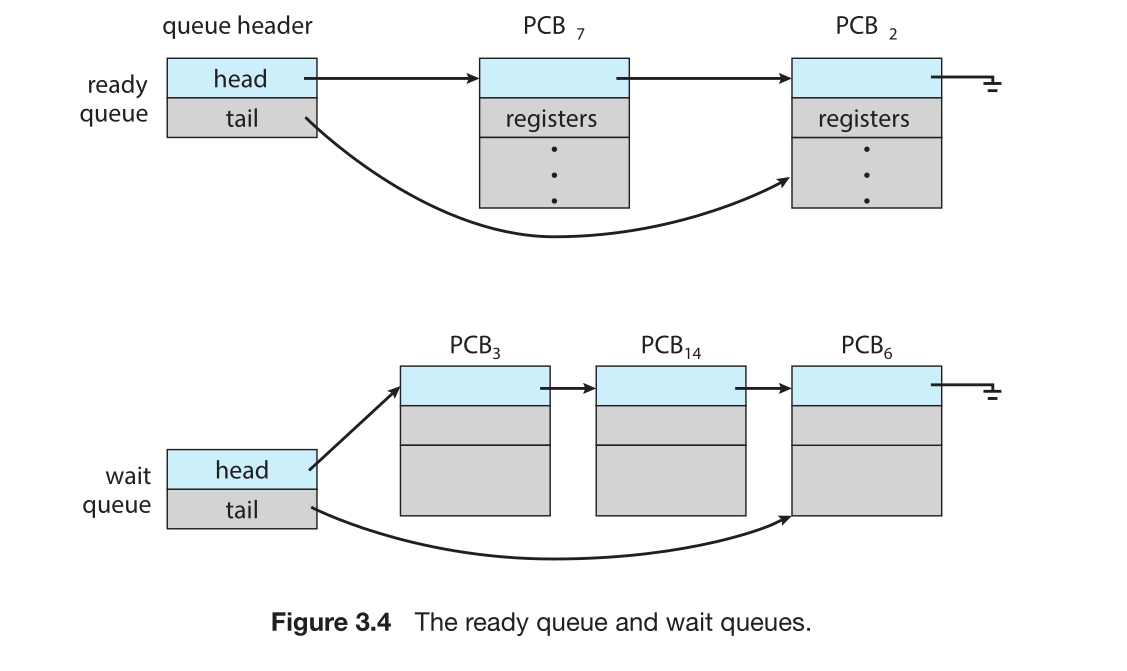




*   **The Ready Queue:** This is a queue of all processes that are in the **ready state** (loaded in memory and ready to execute, just waiting for a CPU core). The PCBs of these processes are typically linked together in this queue. The scheduler picks the next process to run from the head of this queue.
*   **Wait Queues (or Device Queues):** When a process issues an I/O request, it is moved from the running state to a **waiting state** and its PCB is placed on a wait queue for that specific device (e.g., a disk queue, a keyboard queue). When the I/O operation completes, the process is moved back to the ready queue.

#### **Degree of Multiprogramming**

The number of processes currently residing in memory (and thus capable of being scheduled) is known as the **degree of multiprogramming**.

*   On a single-core CPU, only one process can be *running* at any instant, but multiple processes can be in the *ready* and *waiting* states.
*   On a multicore system, the number of running processes can be up to the number of cores.
*   If there are more ready processes than available cores, the excess processes must wait in the ready queue until a core is free.

#### **Process Behavior: I/O-bound vs. CPU-bound**

An effective scheduler must also consider the general behavior of a process, which generally falls into one of two categories:

*   **I/O-bound Process:** This type of process spends more of its time doing I/O operations than computations. These processes typically run for only short bursts before they need to wait for an I/O request to complete (e.g., a text editor waiting for user input, a web server waiting for a network packet). I/O-bound processes typically have many short CPU bursts.
*   **CPU-bound Process:** This type of process generates I/O requests infrequently and spends more of its time performing computations (e.g., a scientific calculation, a complex video encoding task). CPU-bound processes typically have few, but very long, CPU bursts.

A good scheduling system maintains a balance: it must give quick, responsive service to I/O-bound processes to keep them from waiting too long, while also ensuring that CPU-bound processes make steady progress.

---

#### **Process Representation in Linux**

In the Linux operating system, the Process Control Block (PCB) is implemented as a C structure named `task_struct`. You can find this defined in the kernel source code in the file `<include/linux/sched.h>`. This single structure contains all the information the kernel needs to manage a process.

Some of the key fields inside the `task_struct` include:

*   `long state;` // stores the current state of the process (running, waiting, etc.)
*   `struct sched_entity se;` // contains scheduling information for this process
*   `struct task_struct *parent;` // a pointer to the PCB of the process that created this one
*   `struct list_head children;` // a list of the PCBs of processes created by this one
*   `struct files_struct *files;` // a list of open files for this process
*   `struct mm_struct *mm;` // memory management information (like page tables)

The kernel keeps track of all active processes by linking their `task_struct` PCBs together in a **doubly linked list**. It also maintains a special pointer, `current`, which points to the `task_struct` of the process currently executing on the CPU.

For example, if the kernel needs to change the state of the currently running process, it can simply execute:
`current->state = new_state;`



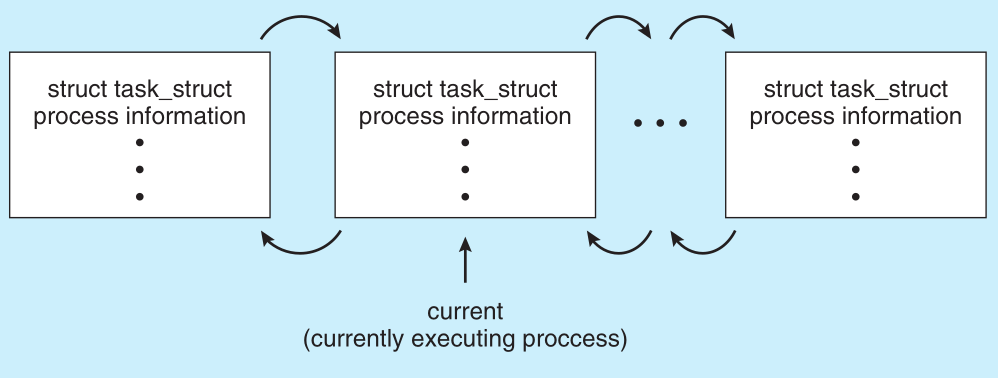



### **3.2.1 Scheduling Queues**



To manage the many processes in various states, the operating system uses a series of queues. Think of these as waiting lines for different resources.

#### **The Ready Queue**

As processes enter the system, they are placed into the **ready queue**. This queue holds all processes that are loaded in memory and ready to execute, but are waiting for their turn on a CPU core.

*   **Implementation:** This queue is typically stored as a **linked list** of Process Control Blocks (PCBs).
*   **Structure:** There is a **ready-queue header** that contains a pointer to the first PCB in the list. Each PCB in the list has a pointer field that points to the next PCB in the ready queue.

#### **Wait Queues**

The system also includes other queues, known collectively as **wait queues** (or device queues). A process is moved to a wait queue when it cannot continue execution until a specific event occurs.

*   **Common Reason:** The most common reason is an **I/O request**. For example, if a process needs to read data from a disk, it must wait because devices like disks run much slower than the CPU. Rather than letting the CPU sit idle, the OS moves the process to the appropriate **I/O wait queue** until the data is available.

#### **The Queueing Diagram**

The flow of processes through these queues is best visualized with a queueing diagram. **Go to Figure 3.5** for a representation of process scheduling.

In this diagram:
*   The **rectangles** represent the queues (the ready queue and various wait queues).
*   The **circles** represent the resources that serve the queues (the CPU and I/O devices).
*   The **arrows** indicate the flow of processes from one state to another.

#### **The Lifecycle of a Process in the Queues**

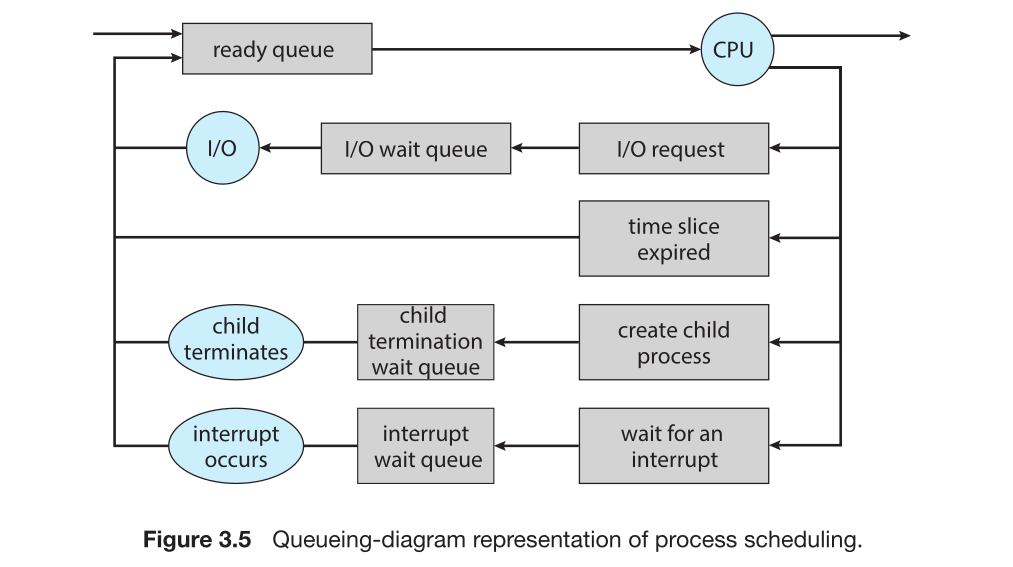





Let's trace the path a process takes through the system, following Figure 3.5:

1.  A **new process** is initially put into the **ready queue**.

2.  It waits there until it is **dispatched** (selected) by the CPU scheduler and assigned to a CPU core.

3.  Once the process is **executing** on the CPU, one of several events can occur:
    *   **The process issues an I/O request:** It is immediately moved from the CPU to the relevant **I/O wait queue**. (Path: CPU -> "I/O request" -> I/O wait queue)
    *   **The process creates a child process and waits for it:** It is moved to a **wait queue** until the child process terminates. (Path: CPU -> "create child process" -> child termination wait queue)
    *   **An interrupt occurs or the time slice expires:** The process is forcibly removed from the CPU and placed back into the **ready queue** to wait for its next turn. (Path: CPU -> "time slice expired" -> ready queue)

4.  For processes in wait queues (the first two cases), the transition back to readiness happens when the event they were waiting for occurs:
    *   An I/O operation completes, moving the process from the I/O wait queue back to the ready queue. (Path: I/O wait queue -> "I/O" -> ready queue)
    *   A child process terminates, moving the waiting parent from the child termination wait queue back to the ready queue.

This cycle of moving between the **ready queue**, the **CPU**, and various **wait queues** continues for the entire life of the process.

5.  When the process **terminates**, it is removed from all queues, and its PCB and all other resources are deallocated by the operating system.

### **3.2.2 CPU Scheduling**

We've seen how processes move between queues. The central component that manages the "ready queue -> CPU" transition is the **CPU scheduler** (often just called the *scheduler*).

#### **The Role of the CPU Scheduler**

The core responsibility of the CPU scheduler is to select one process from the **ready queue** and allocate a CPU core to it. This decision is called a **scheduling decision**.

This selection process needs to happen very frequently for two key reasons:

1.  **I/O-bound Processes:** These processes may only execute for a few milliseconds before they issue an I/O request and are moved to a wait queue. The scheduler must be ready to quickly pick a new process to run.
2.  **Time Sharing and Fairness:** Even a **CPU-bound process** is not allowed to keep the CPU for as long as it wants. To maintain system responsiveness and fairness, the operating system uses timer interrupts to **forcibly remove** the CPU from a running process after a specific time interval (called a **time slice** or **quantum**). When this time slice expires, the process is moved back to the ready queue, and the scheduler immediately runs to select the next process.

Because of this, the CPU scheduler is one of the most frequently executed parts of the OS, running at least once every 100 milliseconds, and often much more.

---

#### **Intermediate Scheduling and Swapping**

Beyond the short-term CPU scheduler, some operating systems employ an intermediate form of scheduling. This is not about deciding which process runs next on the CPU, but about deciding which processes are allowed to be in memory and thus eligible for the ready queue.

The key idea is that sometimes it's beneficial to **reduce the degree of multiprogramming** (the number of processes in memory). This is done through a mechanism called **swapping**.

*   **Swapping Out:** The OS can decide to remove a process completely from memory. It saves the entire process's image (its code, data, stack, and PCB state) to a special area on the disk (called the **swap space**). This process is now no longer in the ready queue and is not competing for the CPU.
*   **Swapping In:** Later, the OS can load the swapped-out process from disk back into memory, restoring its status so it can continue execution from where it left off.

**Why is Swapping Necessary?**
Swapping is typically used as a memory management technique. It becomes necessary when the system has **overcommitted memory** (i.e., there are more processes in memory than physical RAM can comfortably hold). By swapping out some idle processes, the OS frees up physical memory for active processes. We will discuss swapping in detail in **Chapter 9**.

### **3.2.3 Context Switch**

When the CPU scheduler decides to stop running one process and start running another, a fundamental operation must occur: the **context switch**. This is the mechanism that makes multitasking possible.

#### **What is a Context Switch?**

A context switch is the process of saving the state of the currently running process (the "old" process) and loading the saved state of the new process to run.

*   **The "Context":** The context of a process is all the information the CPU needs to resume that process from exactly where it left off. This is represented in the process's **PCB** and includes:
    *   The value of all **CPU registers** (including the program counter).
    *   The process state.
    *   Memory-management information (like page table pointers).
*   **The Operation:** The core task is a **state save** of the old process's context into its PCB, followed by a **state restore** of the new process's context from its PCB.

**Go to Figure 3.6** for a diagram illustrating a context switch between two processes, P0 and P1.

#### **Context Switch Overhead**

It is crucial to understand that **context-switch time is pure overhead**. While the CPU is busy saving and restoring contexts, it is not executing any user instructions or performing useful work for any process. The system's performance depends on making context switches as fast as possible.

*   **Typical Speed:** A context switch typically takes several microseconds.
*   **Factors Influencing Speed:**
    *   **Hardware Support:** This is the biggest factor. Some processors have features like multiple register sets. This allows a context switch to happen by simply changing a hardware pointer to the current register set, which is extremely fast. If there are more processes than register sets, the OS must fall back to copying data to and from memory.
    *   **Memory Speed:** The speed of the RAM.
    *   **Number of Registers:** The more data that must be copied, the longer it takes.
    *   **OS Complexity:** More complex operating systems, especially those using advanced memory management (like paging, covered in Chapter 9), have more work to do during a context switch (e.g., switching page tables, flushing translation lookaside buffers (TLBs)).

---

#### **Multitasking in Mobile Systems**

Mobile operating systems like iOS and Android handle process scheduling with additional constraints, primarily to conserve battery life.

**iOS (Apple):**
*   **Early versions** were very restrictive. Only one user application could run in the **foreground** (the app on the screen). All other user apps were **suspended** (not scheduled for CPU time).
*   Starting with **iOS 4**, a limited form of multitasking was introduced, allowing a single foreground app to run concurrently with multiple **background** apps (in memory but not on the display). The API allowed certain app types (like music players) to perform limited tasks in the background.
*   As hardware improved (more memory, multiple cores, better batteries), iOS supported richer multitasking, such as **split-screen** on iPads, which allows two foreground apps to run simultaneously.

**Android:**
*   Android has always supported multitasking and does not restrict which applications can run in the background.
*   However, if a background app needs to perform work, it must use a **service**. A service is a separate application component that runs on behalf of the background process without a user interface.
*   **Example:** A music streaming app uses a service. When you switch to another app, the main application may be suspended, but the service continues running to send audio data to the device driver. This design is efficient because services have a small memory footprint.